Train Image Directory: /content/drive/MyDrive/Colab Notebooks/Alzheimers/train
Test Image Directory: /content/drive/MyDrive/Colab Notebooks/Alzheimers/test
Found 1101 images belonging to 5 classes.
Found 195 images belonging to 5 classes.
Epoch 1/50
35/35 [==============================] - ETA: 0s - loss: 1.5190 - accuracy: 0.4242

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


35/35 [==============================] - 429s 12s/step - loss: 1.5190 - accuracy: 0.4242 - val_loss: 1.4200 - val_accuracy: 0.4462
Epoch 2/50
35/35 [==============================] - 19s 547ms/step - loss: 1.4233 - accuracy: 0.4478 - val_loss: 1.4140 - val_accuracy: 0.4462
Epoch 3/50
35/35 [==============================] - 19s 523ms/step - loss: 1.4244 - accuracy: 0.4478 - val_loss: 1.4188 - val_accuracy: 0.4462
Epoch 4/50
35/35 [==============================] - 20s 565ms/step - loss: 1.4188 - accuracy: 0.4478 - val_loss: 1.4148 - val_accuracy: 0.4462
Epoch 5/50
35/35 [==============================] - 19s 550ms/step - loss: 1.4179 - accuracy: 0.4478 - val_loss: 1.4128 - val_accuracy: 0.4462
Epoch 6/50
35/35 [==============================] - 19s 543ms/step - loss: 1.4150 - accuracy: 0.4478 - val_loss: 1.4160 - val_accuracy: 0.4462
Epoch 7/50
35/35 [==============================] - 19s 536ms/step - loss: 1.4173 - accuracy: 0.4478 - val_loss: 1.4124 - val_accuracy: 0.4462
Epoch 8/50


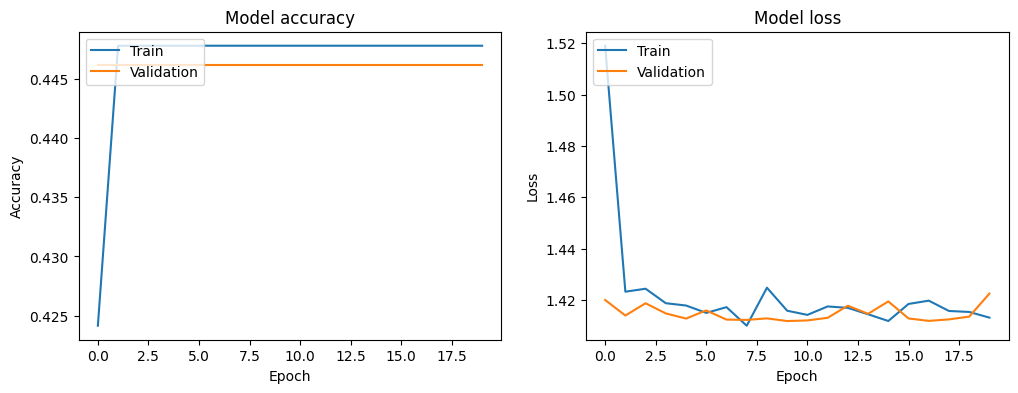

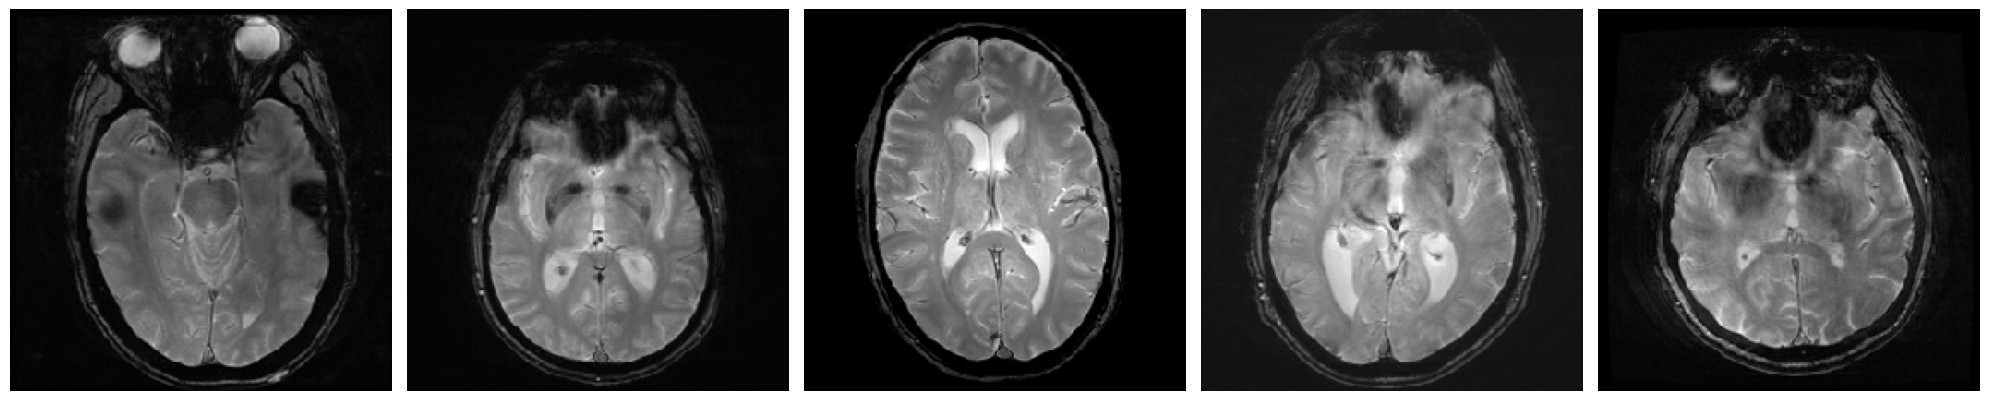

1/1 [==============================] - 0s 152ms/step


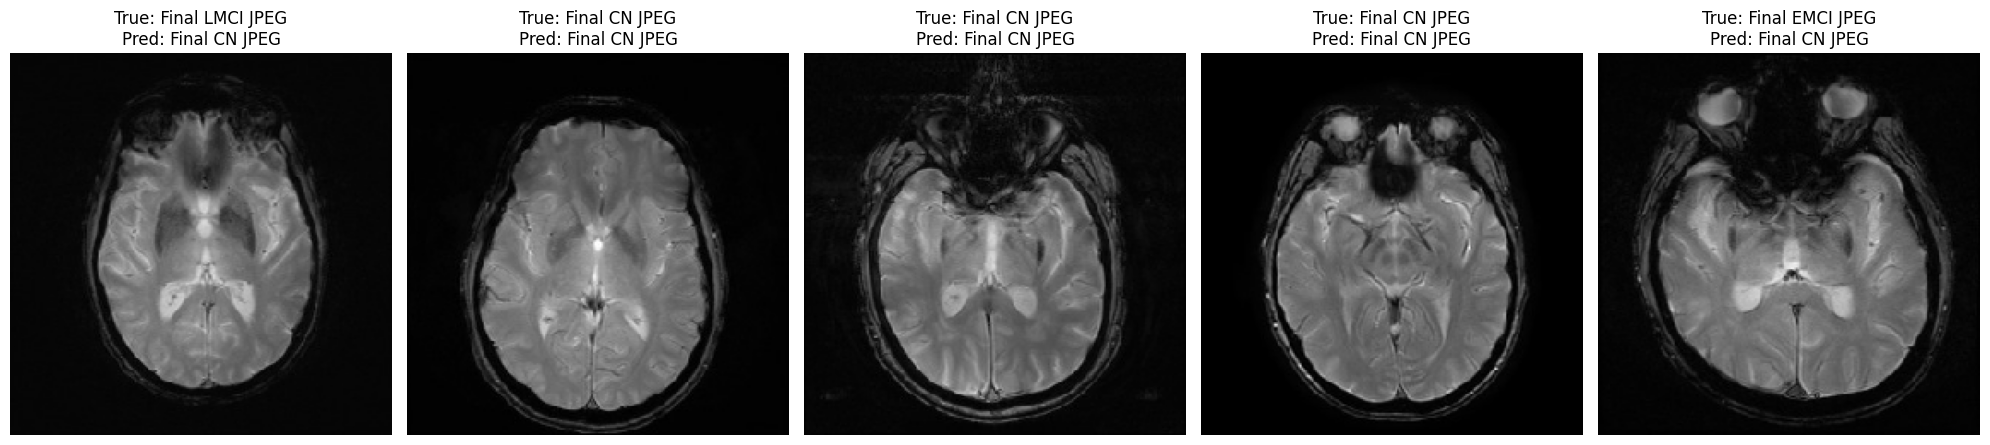

7/7 [==============================] - 1s 131ms/step


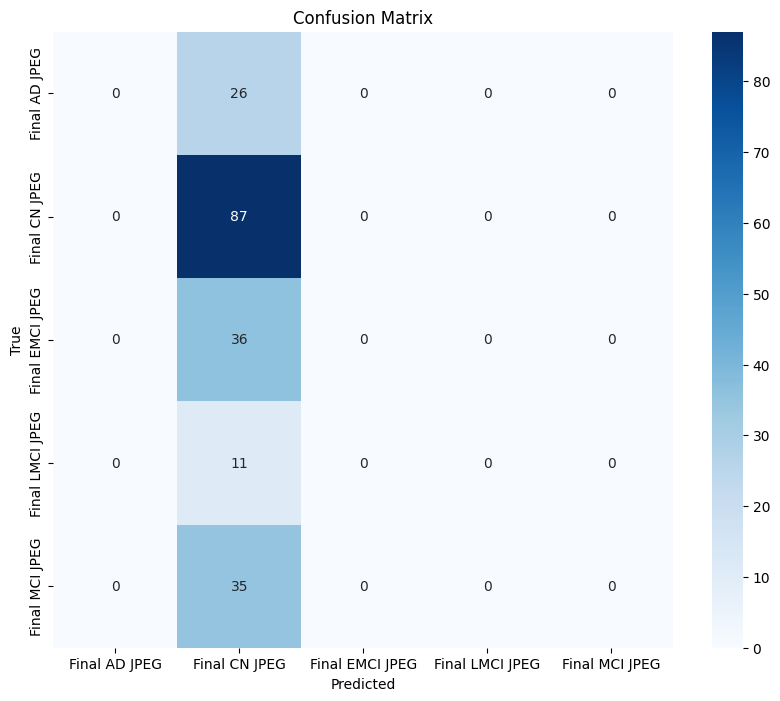

Classification Report
                 precision    recall  f1-score   support

  Final AD JPEG       0.00      0.00      0.00        26
  Final CN JPEG       0.45      1.00      0.62        87
Final EMCI JPEG       0.00      0.00      0.00        36
Final LMCI JPEG       0.00      0.00      0.00        11
 Final MCI JPEG       0.00      0.00      0.00        35

       accuracy                           0.45       195
      macro avg       0.09      0.20      0.12       195
   weighted avg       0.20      0.45      0.28       195



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define paths
train_image_dir = r"/content/drive/MyDrive/Colab Notebooks/Alzheimers/train"
test_image_dir = r"/content/drive/MyDrive/Colab Notebooks/Alzheimers/test"

print("Train Image Directory:", train_image_dir)
print("Test Image Directory:", test_image_dir)

# Image Data Generator with Data Augmentation
train_image_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_image_datagen = ImageDataGenerator(rescale=1./255)

try:
    # Load image data
    train_image_generator = train_image_datagen.flow_from_directory(
        train_image_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    test_image_generator = test_image_datagen.flow_from_directory(
        test_image_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )
except Exception as e:
    print(f"Error loading images: {e}")
    raise

image_input = Input(shape=(224, 224, 3), name='image_input')
x = Conv2D(32, (3, 3), activation='relu')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.5)(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)

model = Model(inputs=image_input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_image_generator,
    epochs=20,
    validation_data=test_image_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# Load the best model
model.load_weights('best_model.h5')

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_image_generator)
print(f'Test Accuracy: {test_acc:.2f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Display sample images from the dataset
sample_images, sample_labels = next(test_image_generator)

fig, axes = plt.subplots(1, 5, figsize=(20, 20))
axes = axes.flatten()
for img, ax in zip(sample_images, axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

# Get class labels
class_labels = list(train_image_generator.class_indices.keys())

# Predict and display results for sample images
sample_images, sample_labels = next(test_image_generator)
predictions = model.predict(sample_images)

fig, axes = plt.subplots(1, 5, figsize=(20, 20))
axes = axes.flatten()
for img, ax, prediction, true_label in zip(sample_images, axes, predictions, sample_labels):
    ax.imshow(img)
    pred_label = class_labels[np.argmax(prediction)]
    true_label = class_labels[np.argmax(true_label)]
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Get the true labels and predicted labels
test_image_generator.reset()
Y_pred = model.predict(test_image_generator, test_image_generator.samples // test_image_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_image_generator.classes

# Class labels
class_labels = list(test_image_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=class_labels))
